# Introduction to this notebook

In [1]:
"""
What? Decision tree tuning.

3 strategies are shown:
[1] Tuning the number of decision tree
[2] Tuning the size of decision trees
[3] Tuning the number & size of decision trees

https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
https://www.kaggle.com/c/otto-group-product-classification-challenge/overview
"""

'\nWhat? Decision tree tuning.\n\nTuning some hyperparameters in boosted decision tree within XGBoost.\n\nTo show you how they work 3 strategies are shown:\n[1] Tuning the number of decision tree\n[2] Tuning the size of decision trees\n[3] Tuning the number & size of decision trees\n\nNote: I have used 8 CPUs in my MAC and that took a while.\n\nDate: 01/12/20\nReference: Data preparation for machine learning, Jason Brownlee\n'

# Import python modules

In [31]:
import numpy as np
from pylab import rcParams
from pandas import read_csv
from matplotlib import pyplot
from xgboost import XGBClassifier
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Load dataset

In [ ]:
"""
The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, 
including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). We are selling millions of products 
worldwide every day, with several thousand products being added to our product line.

A consistent analysis of the performance of our products is crucial. However, due to our diverse global 
infrastructure, many identical products get classified differently. Therefore, the quality of our product 
analysis depends heavily on the ability to accurately cluster similar products. The better the classification,
the more insights we can generate about our product range.
"""

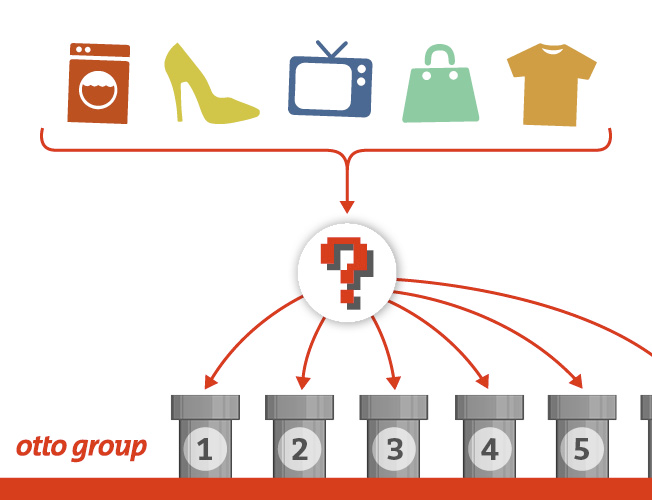

In [4]:
data = read_csv('../DATASETS/train_Otto_classification.csv')
dataset = data.values
# split data into X (input) and y (target)
X = dataset[:,0:94]
y = dataset[:,94]

# Data peak

In [ ]:
"""
Peaking at the frist 5 entries of the dataset.
"""

In [7]:
data.head(5)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


# Data preparaition

In [ ]:
"""
As you can see the target "y" is of type string and need to be turned into something the PC can understand.
We can do using the label encoder function within scikitlearn. This will trun the string values into integers.
"""

In [8]:
print("Before encoding")
print(y[:10])

Before encoding
['Class_1' 'Class_1' 'Class_1' 'Class_1' 'Class_1' 'Class_1' 'Class_1'
 'Class_1' 'Class_1' 'Class_1']


In [10]:
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
print("After encoding")
print(label_encoded_y[:10])

After encoding
[0 0 0 0 0 0 0 0 0 0]


## [1] Tuning the number of decision tree

In [ ]:
"""
Grid search cpst can be estimated as follows:
No of fits = No_of_estimator * No_splits

STRATIFIED K-FOLD
stratified k-fold cross-validation = keeps the ratio of labels in each fold constant. 
If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, 
you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this 
can result in folds with all negative samples.  Then just use stratified k-fold cross-validation which keeps the 
ratio of labels in each fold constant. 
"""

In [14]:
%pdoc XGBClassifier()

Object `XGBClassifier()` not found.


In [11]:
model = XGBClassifier()
n_estimators = range(5, 75, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = 8, cv = kfold) 
grid_result = grid_search.fit(X, label_encoded_y)

# Summarize results

In [12]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Summarize results
Best: -0.001155 using {'n_estimators': 65}
-0.255035 (0.000293) with: {'n_estimators': 5}
-0.013064 (0.000631) with: {'n_estimators': 15}
-0.001726 (0.000922) with: {'n_estimators': 25}
-0.001201 (0.001078) with: {'n_estimators': 35}
-0.001166 (0.001063) with: {'n_estimators': 45}
-0.001156 (0.001054) with: {'n_estimators': 55}
-0.001155 (0.001052) with: {'n_estimators': 65}


# Print the results

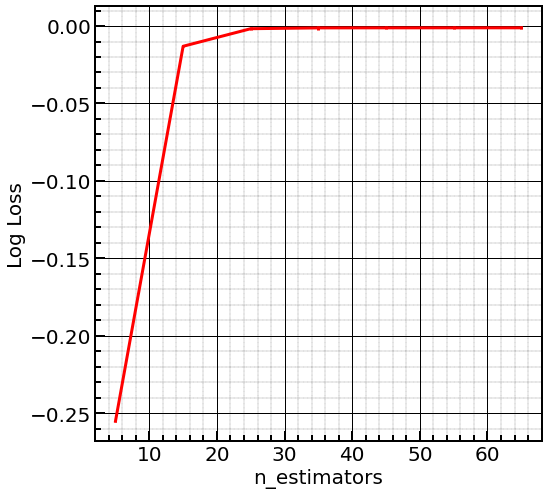

In [19]:
rcParams['figure.figsize'] = 8, 8
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()
#pyplot.title("XGBoost n_estimators vs Log Loss") 
pyplot.errorbar(n_estimators, means, yerr = stds, lw=3, c="r") 
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss') 

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.minorticks_on()
pyplot.show()

In [8]:
"""
We can see how the log-loss reached a plateau. Which means we CAN TRADE the number of tree
for a better run time. In fact, adding extra tree is NOT improving the result.
"""

'\nWe can see how the log-loss reached a plateau. Which mean we can trade the number of tree\nfor a better run time. In fact, adding extra tree is NOT improving the result.\n'

## [2] Tuning the size of decision trees

In [9]:
"""
In gradient boosting, we can control the size of decision trees, also called the number of 
layers or the depth. Shallow trees are expected to have poor performance because they 
capture few details of the problem and are generally referred to as weak learners.
"""

'\nIn gradient boosting, we can control the size of decision trees, also called the number of \nlayers or the depth. Shallow trees are expected to have poor performance because they \ncapture few details of the problem and are generally referred to as weak learners.\n'

In [20]:
# grid search
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.4min finished


# Summarize results

In [25]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001271 using {'max_depth': 4, 'n_estimators': 30}
-0.347692 (0.001736) with: {'max_depth': 1, 'n_estimators': 10}
-0.104487 (0.000791) with: {'max_depth': 1, 'n_estimators': 20}
-0.033825 (0.000543) with: {'max_depth': 1, 'n_estimators': 30}
-0.065335 (0.000769) with: {'max_depth': 2, 'n_estimators': 10}
-0.004360 (0.000793) with: {'max_depth': 2, 'n_estimators': 20}
-0.001385 (0.001083) with: {'max_depth': 2, 'n_estimators': 30}
-0.061297 (0.000575) with: {'max_depth': 3, 'n_estimators': 10}
-0.003985 (0.000787) with: {'max_depth': 3, 'n_estimators': 20}
-0.001314 (0.001040) with: {'max_depth': 3, 'n_estimators': 30}
-0.058469 (0.000629) with: {'max_depth': 4, 'n_estimators': 10}
-0.003793 (0.000830) with: {'max_depth': 4, 'n_estimators': 20}
-0.001271 (0.001074) with: {'max_depth': 4, 'n_estimators': 30}


# Print the results

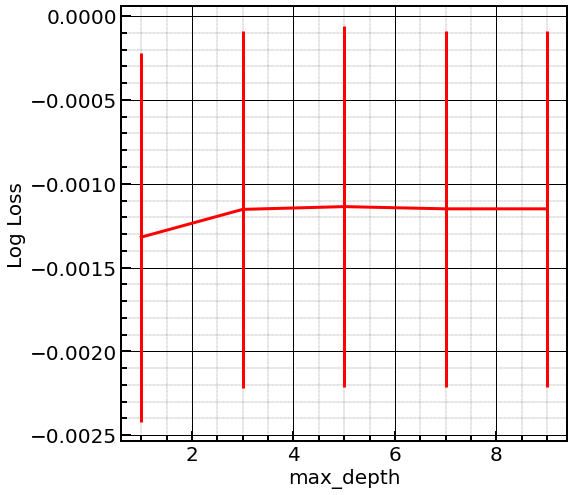

In [23]:
rcParams['figure.figsize'] = 8, 8
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()

pyplot.errorbar(max_depth, means, yerr=stds, lw = 3, c = "r") 
#pyplot.title("XGBoost max_depth vs Log Loss") 
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.minorticks_on()
pyplot.show()

In [13]:
"""
Reviewing the plot of log loss scores, we can see a marked jump from max depth=1 
to max depth=3 then pretty even performance for the rest the values of max depth. 
Although the best score was observed for max depth=5, it is interesting to note 
that there was practically little difference between using max depth=3 or max depth=7. 
This suggests a point of DIMINISHING RETURNS in max depth.
"""

'\nReviewing the plot of log loss scores, we can see a marked jump from max depth=1 \nto max depth=3 then pretty even performance for the rest the values of max depth. \nAlthough the best score was observed for max depth=5, it is interesting to note \nthat there was practically little difference between using max depth=3 or max depth=7. \nThis suggests a point of diminishing returns in max depth.\n'

## [3] Tuning the number & size of decision trees

In [14]:
"""
So far we have seen the effect tuning has on each one of the factor while keeping the other constant.
But, what happens we have to do both at the same time? Does it makse sense? It tunrs out that there is 
a relationship between the number of trees in the model and the depth of each tree.

Estimating cost of grid search
No of fits = No_of_estimator * No_max_depth * No_splits = 3*4*10 = 120
"""

'\nThere is a relationship between the number of trees in the model and the depth of each tree.\n'

In [24]:
model = XGBClassifier()
n_estimators = [10, 20, 30]
max_depth = [1, 2, 3, 4]


# The name we are using must be defined within the model
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 10.3min finished


# Summarize results

In [27]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001271 using {'max_depth': 4, 'n_estimators': 30}
-0.347692 (0.001736) with: {'max_depth': 1, 'n_estimators': 10}
-0.104487 (0.000791) with: {'max_depth': 1, 'n_estimators': 20}
-0.033825 (0.000543) with: {'max_depth': 1, 'n_estimators': 30}
-0.065335 (0.000769) with: {'max_depth': 2, 'n_estimators': 10}
-0.004360 (0.000793) with: {'max_depth': 2, 'n_estimators': 20}
-0.001385 (0.001083) with: {'max_depth': 2, 'n_estimators': 30}
-0.061297 (0.000575) with: {'max_depth': 3, 'n_estimators': 10}
-0.003985 (0.000787) with: {'max_depth': 3, 'n_estimators': 20}
-0.001314 (0.001040) with: {'max_depth': 3, 'n_estimators': 30}
-0.058469 (0.000629) with: {'max_depth': 4, 'n_estimators': 10}
-0.003793 (0.000830) with: {'max_depth': 4, 'n_estimators': 20}
-0.001271 (0.001074) with: {'max_depth': 4, 'n_estimators': 30}


# Plot results

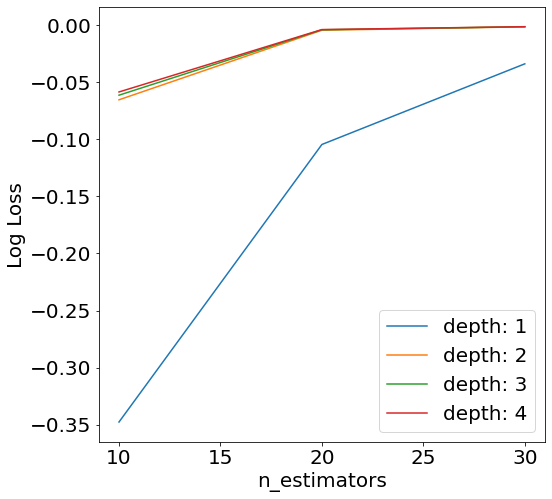

In [32]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))

rcParams['figure.figsize'] = 8, 8
rcParams['font.size'] = 20

for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value)) 
    pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.minorticks_on()
pyplot.show()

In [ ]:
"""
The lines overlap making it hard to see the relationship, but generally we can see 
the interaction we expect. Fewer boosted trees are required with increased tree depth.
Further, we would expect the increase complexity provided by deeper individual trees 
to result in greater overfitting of the training data which would be exacerbated by 
having more trees, in turn resulting in a lower cross-validation score. We don’t see 
this here as our trees are not that deep nor do we have too many.
"""